# Определение стоимости автомобилей
___________________________

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание исследования</a></span><ul class="toc-item"><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#Задачи-исследования" data-toc-modified-id="Задачи-исследования-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Задачи исследования</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#XGBRegressor" data-toc-modified-id="XGBRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><strong>XGBRegressor</strong></a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Описание исследования

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.

Заказчику важны:
качество предсказания;
скорость предсказания;
время обучения.

### Цель исследования

Построить модель машинного обучения, характеризующуюся наилучшими показателями (скорость работы и точность результата), для прогнозирования стоимости автомобиля.


### Задачи исследования

1. Загрузить и подготовить данные.
2. Обучить разные модели. Для каждой попробовать различные гиперпараметры.
3. Проанализировать скорость работы и качество моделей.

**Примечания:**
Для оценки качества моделей применять метрику RMSE.
Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
Поскольку модель градиентного бустинга может обучаться долго, измените у неё только два-три параметра.
Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del:
del features_train 


### Описание данных

Данные находятся в файле `/datasets/autos.csv`.

**Признаки:**

* `DateCrawled` — дата скачивания анкеты из базы;
* `VehicleType` — тип автомобильного кузова;
* `RegistrationYear` — год регистрации автомобиля;
* `Gearbox` — тип коробки передач;
* `Power` — мощность (л. с.);
* `Model` — модель автомобиля;
* `Kilometer` — пробег (км);
* `RegistrationMonth` — месяц регистрации автомобиля;
* `FuelType` — тип топлива;
* `Brand` — марка автомобиля;
* `NotRepaired` — была машина в ремонте или нет;
* `DateCreated` — дата создания анкеты;
* `NumberOfPictures` — количество фотографий автомобиля;
* `PostalCode` — почтовый индекс владельца анкеты (пользователя);
* `LastSeen` — дата последней активности пользователя.

**Целевой признак:**

* `Price` — цена (евро).

## Подготовка данных

1) Для начала импортируем необходимые для работы библиотеки.

In [36]:
!pip install lightgbm
!pip install catboost
!pip install xgboost

import pandas as pd
import numpy as np

import random
import copy

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import datetime
import time

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

2) Выведем и изучим исходные данные.

In [37]:
df = pd.read_csv('/datasets/autos.csv')

display(df.head())
display(df.info())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

В исходном датасете содержится информация в 16 столбцах и 354369 строках (в некоторых записях есть пропуски).
Информация представлена в текстовом и числовом виде.



In [38]:
print('Выгрузка осуществлялась в период с ', df['DateCrawled'].min(), 'по', df['DateCrawled'].max())
print('Анкеты создавались в период с ', df['DateCreated'].min(), 'по', df['DateCreated'].max())

Выгрузка осуществлялась в период с  2016-03-05 14:06:22 по 2016-04-07 14:36:58
Анкеты создавались в период с  2014-03-10 00:00:00 по 2016-04-07 00:00:00


3) Часть из этих столбцов не пригодится для дальнейших вычислений, так как эти признаки не могут влиять на стоимость автомобилей: `DateCrawled` (дата скачивания анкеты из базы), `DateCreated` (дата создания анкеты), `NumberOfPictures` (количество фотографий автомобиля), `LastSeen` (дата последней активности пользователя). 

Удалим эти столбцы.

In [39]:
df = df.drop(['DateCrawled',
              'DateCreated',
              'NumberOfPictures',
              'LastSeen'],
             axis=1)

display(df.info())             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              354369 non-null  int64 
 1   VehicleType        316879 non-null  object
 2   RegistrationYear   354369 non-null  int64 
 3   Gearbox            334536 non-null  object
 4   Power              354369 non-null  int64 
 5   Model              334664 non-null  object
 6   Kilometer          354369 non-null  int64 
 7   RegistrationMonth  354369 non-null  int64 
 8   FuelType           321474 non-null  object
 9   Brand              354369 non-null  object
 10  NotRepaired        283215 non-null  object
 11  PostalCode         354369 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 32.4+ MB


None

4) Определим количество пропусков в каждом столбце в процентах.

In [40]:
df.isna().mean()*100

Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
PostalCode            0.000000
dtype: float64

Пропуски имеются в следующих столбцах:
- `VehicleType` - тип автомобильного кузова;
- `Gearbox` - тип коробки передач;
- `Model` - модель автомобиля;
- `FuelType` - тип топлива;
- `NotRepaired` - была машина в ремонте или нет.

Рассмотрим, какие уникальные значения содержатся в каждом из этих параметров.

In [41]:
param_list = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']

for param in param_list:
    print(param,'\n', df[param].unique(), '\n', sep='')

VehicleType
[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']

Gearbox
['manual' 'auto' nan]

Model
['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuor

Пропуски в категориальных параметрах `VehicleType`, `Gearbox`, `FuelType`, `Model`, `NotRepaired` заполним значением `'unknown'`.

In [42]:
for column in param_list:
    df[column] = df[column].fillna('unknown')
    
df.isna().mean()*100    

Price                0.0
VehicleType          0.0
RegistrationYear     0.0
Gearbox              0.0
Power                0.0
Model                0.0
Kilometer            0.0
RegistrationMonth    0.0
FuelType             0.0
Brand                0.0
NotRepaired          0.0
PostalCode           0.0
dtype: float64

5) Выведем общую информацию для численных значений и проанализируем каждый параметр.

In [43]:
display(df.describe())

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,99998.000000


* **RegistrationYear**

В столбце, содержащем информацию о годе регистрации автомобиля минимальное и максимальное значения далеки от реальности. Посмотрим, как распределяются данные по годам.

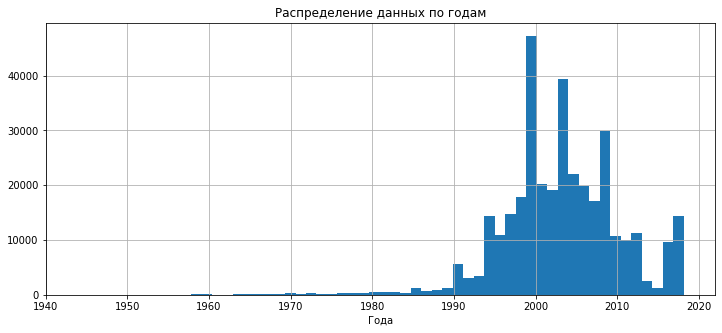

In [44]:
df['RegistrationYear'].hist(bins=7000, figsize=(12,5))
plt.xlim([1940, 2022])
plt.title('Распределение данных по годам')
plt.xlabel('Года')
plt.show()

Видно, что в основном автомобили регистрировались в интервале от 1960 и до 2019 года. Выделим интервал от 1950 до 2015 года (так как выгрузка анкет из баз осуществлялась в 2016 году и анкеты зарегистрированных позже автомобилей в нее попасть не могли), остальные значения будем считать аномальными и рассматривать далее их не будем.

In [45]:
df = df.query('RegistrationYear>1949 & RegistrationYear<2016')

print('Самая ранняя дата:', df['RegistrationYear'].min())
print('Самая поздняя дата:', df['RegistrationYear'].max())

Самая ранняя дата: 1950
Самая поздняя дата: 2015


* **RegistrationMonth**

В столбце с месяцем регистрации встречаются 0 значения. Определим количество таких записей.

In [46]:
df['RegistrationMonth'][df['RegistrationMonth']==0].count()

30770

Посмотрим, как распределяются данные в зависимости от месяца регистрации автомобиля.

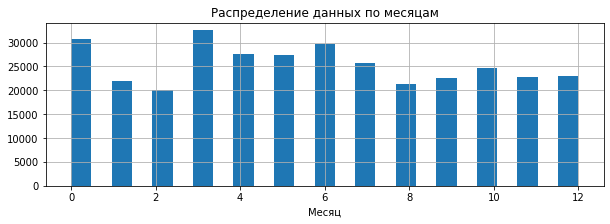

In [47]:
df['RegistrationMonth'].hist(bins=25, figsize=(10,3))
plt.title('Распределение данных по месяцам')
plt.xlabel('Месяц')
plt.show()

Таких значений достаточно много, поэтому удалять их не стоит.
Заменим нулевые значения случайным числом в диапазоне от 1 (январь) до 12 (декабрь).

In [48]:
def month_date(row):
    month = row['RegistrationMonth']
    if month == 0:
        return random.randint(1,12)
    else:    
        return month

df['RegistrationMonth'] = df.apply(month_date, axis=1)
print(df['RegistrationMonth'].unique())

[ 7  5  8  6 10  1 12 11  2  3  4  9]


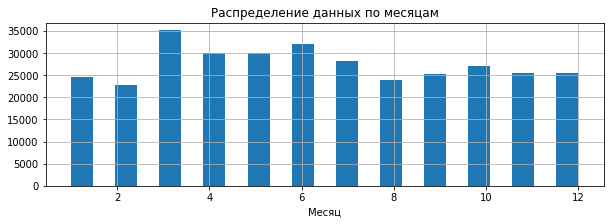

In [49]:
df['RegistrationMonth'].hist(bins=23, figsize=(10,3))
plt.title('Распределение данных по месяцам')
plt.xlabel('Месяц')
plt.show()

Получили, что вид распределения остался похож на тот, что был до произведенных изменений.

* **Power**

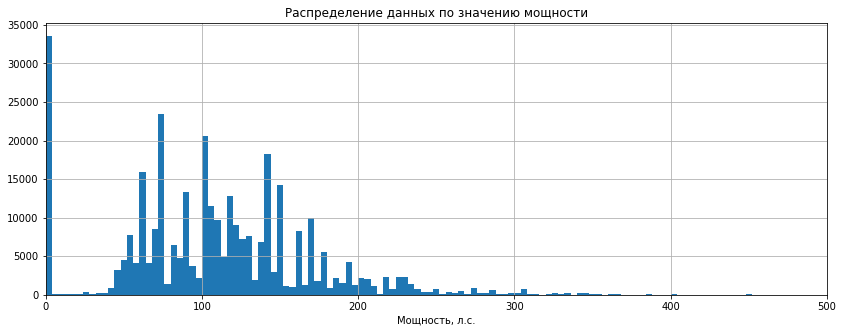

In [50]:
df['Power'].hist(bins=5000, figsize=(14,5))
plt.xlim([0, 500])
plt.title('Распределение данных по значению мощности')
plt.xlabel('Мощность, л.с.')
plt.show()

Максимальное значение мощности (20000 л.с.) не может быть реальным. Ограничим их значения сверху средней мощностью грузового автомобиля - 460 л.с. Большое количество нулевых значений обрабатывать не будем, предоставив это модели.

In [51]:
df = df.query('Power<461')

* **Kilometer**

In [52]:
print(df['Kilometer'].unique())

[150000 125000  90000  40000  30000  70000 100000  60000   5000  20000
  80000  50000  10000]


Судя по значениям пробега, они выбираются пользователем из определенного списка при заполнении анкеты, поэтому трогать их не будем. 

* **Price** 

Целевой признак (стоимость автомобиля) в среднем составляет 4417 евро, максимальное значение - 20000 евро. Вполне реалистичные значения. Однако встречаются записи с нулевой стоимостью, что для целевого признака критично. Необходимо будет определить количество таких аномальных значений и удалить, если их содержится не так много.


In [53]:
df['Price'][df['Price'] < 50].count()

10775

Получаем, что данных с аномально низкой стоимостью содержится примерно 3,7% от общего количества данных. Заменять их чем-либо будет нецелесообразно, поэтому удалим такие строки.

In [54]:
df = df.query('Price>50')

Text(0.5, 1.0, 'Зависимость стоимости автомобиля от года регистрации')

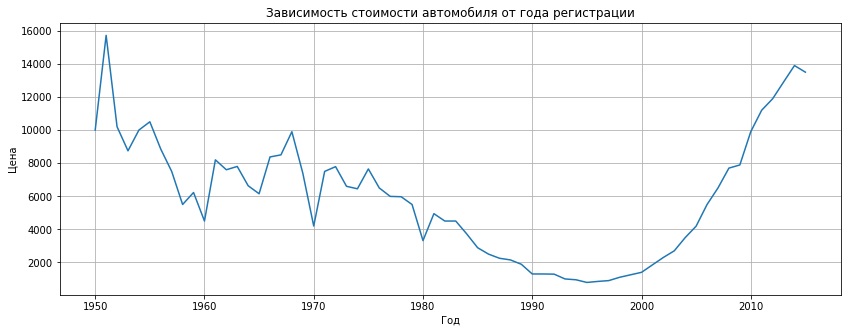

In [55]:
df.groupby('RegistrationYear')['Price'].median().plot(grid=True,figsize=(14,5))
plt.xlabel(r'Год')
plt.ylabel(r'Цена')
plt.title(r'Зависимость стоимости автомобиля от года регистрации')

По графику видно, что нет прямой зависимости целевого параметра от года регистрации автомобиля. 

* Примерно от 1950 до 1995 года более высокая стоимость характерна более возрастным автомобилям - связано с тем, что старые автомобили могут являться коллекционными и, соответсвенно, иметь большую стоимость вне зависимости от мощности и других технических параметров. 

* От 1995 года и до 2014 цена прямопропорциональна году регистрации - то есть чем новее автомобиль, тем его цена выше, так как в этом случае технические характеристики и состояние автомобиля в целом лучше. В 2015 году наблюдается небольшое снижение стоимости, но не критичное.

Целесообразно было бы дополнительно выделить категории автомобилей в зависимости от года выпуска.


Существуют технический код Международной федерации старинных автомобилей (FIVA) и соответствующая классификация по году выпуска, техническим параметрам и сохранности. Для получения идентификационной карты FIVA, необходимой для участия в международных мероприятиях, проводимых под эгидой федерации, автомобиль должен четко соответствовать этим нормам (http://gaz21.ru/articles/misc/180-klassifikacija-avtomobilejj-fiva.html).

**Классификация по году выпуска:**

- Класс A (Ancestor) выпуск до 31.12.1904
- Класс B (Veteran) выпуск с 01.01.1905 по 31.12.1918
- Класс C (Vintage) выпуск с 01.01.1919 по 31.12.1930
- Класс D (Post Vintage) выпуск с 01.01.1931 по 31.12.1945
- Класс E (Post War) выпуск с 01.01.1946 по 31.12.1960
- Класс F - выпуск с 01.01.1961-31.12.1970
- Класс G - выпуск с 01.01.1971-31.12.1980

В этой классификации категории разделяются между собой с разницей примерно в 10 лет. 
В соответсвии с этим выделим следующие категории по десятилетиям:
1. 1950-1959: "1950s"
2. 1960-1969: "1960s"
3. 1970-1979: "1970s"
4. 1980-1989: "1980s"
5. 1990-1999: "1990s"
6. 2000-2009: "2000s"
7. 2010-2015: "2010s"

In [56]:
def year_classification(row):
    year = row['RegistrationYear']
    if year<1960:
        return "1950s"
    if year>1959 and year<1970:
        return "1960s"
    if year>1969 and year<1980:
        return "1970s"
    if year>1979 and year<1990:
        return "1980s"
    if year>1989 and year<2000:
        return "1990s"
    if year>1999 and year<2010:
        return "2000s"
    if year>2009:
        return "2010s"
    

df['Category'] = df.apply(year_classification, axis=1)
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,PostalCode,Category
0,480,unknown,1993,manual,0,golf,150000,7,petrol,volkswagen,unknown,70435,1990s
1,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes,66954,2010s
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,90480,2000s
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074,2000s
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,60437,2000s


In [57]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318457 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              318457 non-null  int64 
 1   VehicleType        318457 non-null  object
 2   RegistrationYear   318457 non-null  int64 
 3   Gearbox            318457 non-null  object
 4   Power              318457 non-null  int64 
 5   Model              318457 non-null  object
 6   Kilometer          318457 non-null  int64 
 7   RegistrationMonth  318457 non-null  int64 
 8   FuelType           318457 non-null  object
 9   Brand              318457 non-null  object
 10  NotRepaired        318457 non-null  object
 11  PostalCode         318457 non-null  int64 
 12  Category           318457 non-null  object
dtypes: int64(6), object(7)
memory usage: 34.0+ MB


None

### Вывод

В процессе подготовки данных было произведено следующее:

- Были удалены столбцы `DateCrawled`, `DateCreated`, `NumberOfPictures`и `LastSeen`.

- Обработаны пропуски в столбцах: `VehicleType` , `Gearbox`, `Model`, `FuelType`, `NotRepaired`.

- Проанализированы численные параметры `Price`,	`RegistrationYear`,	`RegistrationMonth`,`Power`, `Kilometer`,  обработаны найденные аномальные значения.


Количество всех данных после произведенных действий сократилось примерно на 10%.

## Обучение моделей

Для нашей задачи обучим модели *решающего дерева*, *линейной регресии*, а также *CatBoost* и *LightGBM*.

Выделим общие и целевой признак. Разобьем данные на обучающую и тестовую выборки.
Преобразуем категориальные признаки в численные с помощью техники прямого кодирования и сохраним их в новых переменных (понадобятся нам для обучения нескольких моделей).

In [58]:
features = df.drop('Price', axis=1)
ohe_features = pd.get_dummies(features, drop_first=True)

target = df['Price']


features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.25, random_state=123)

ohe_features_train = ohe_features.loc[features_train.index, :]
ohe_features_test = ohe_features.loc[features_test.index, :]

Cтандартизируем численные признаки во всех выборках.

In [59]:
numeric = ['Power', 'Kilometer']

scaler = StandardScaler()

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(ohe_features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

scaler.fit(ohe_features_train[numeric])
ohe_features_train[numeric] = scaler.transform(ohe_features_train[numeric])
ohe_features_test[numeric] = scaler.transform(ohe_features_test[numeric])


Напишем функции по определению продолжительности обучения модели и формирования предсказаний.

In [60]:
# функция по подсчету времени обучения
def train_time(model, features_train, target_train):
    start = time.time()
    model.fit(features_train,target_train)
    end = time.time()
    time_fit = end - start
    return time_fit, model

# функция по подсчету времени предсказания
def predict_time(model,features_test):
    start = time.time()
    predict = model.predict(features_test)
    end = time.time()
    time_predict= end - start
    return time_predict, predict

Создадим датафрейм `results`, в котором будем сохранять полученые результаты по итогам обучения моделей для удобства восприятия. 

In [61]:
results = pd.DataFrame(columns=['RMSE','Train time','Predict time'])

def metrics(RMSE, train_time, predict_time, model_name, df):
    df.loc[model_name,'RMSE'] = RMSE
    df.loc[model_name,'Train time'] = train_time
    df.loc[model_name,'Predict time'] = predict_time
    return df

### DecisionTreeRegressor

Первая модель дерева решений с параметрами `max_depth=20, min_samples_leaf=2, random_state=123`:

In [62]:
tree1_train_time, tree1 = train_time(DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, random_state=123), ohe_features_train, target_train)
tree1_predict_time, tree1_predict = predict_time(tree1, ohe_features_test)
tree1_rmse = np.sqrt(mean_squared_error(target_test, tree1_predict))
metrics(tree1_rmse, tree1_train_time, tree1_predict_time, 'Decision Tree 1', results)

,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784


Вторая модель дерева решений  с параметрами `max_depth=10, min_samples_leaf=3, random_state=123` (уменьшили максимальную глубину и увеличили минимальное количество выборок, необходимых для нахождения в конечном узле):

In [63]:
tree2_train_time, tree2 = train_time(DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, random_state=123), ohe_features_train, target_train)
tree2_predict_time, tree2_predict = predict_time(tree2, ohe_features_test)
tree2_rmse = np.sqrt(mean_squared_error(target_test, tree2_predict))
metrics(tree2_rmse, tree2_train_time, tree2_predict_time, 'Decision Tree 2', results)

,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784
Decision Tree 2,1983.465641,9.503899,0.237671


### LinearRegression

In [64]:
linreg1_train_time,linreg1_model = train_time(LinearRegression(), ohe_features_train, target_train)
linreg1_predict_time,linreg1_predict = predict_time(linreg1_model, ohe_features_test)
linreg1_rmse = np.sqrt(mean_squared_error(target_test, linreg1_predict))
metrics(linreg1_rmse, linreg1_train_time, linreg1_predict_time, 'Linear regression 1', results)

,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784
Decision Tree 2,1983.465641,9.503899,0.237671
Linear regression 1,2254.893778,35.297776,0.312201


### CatBoostRegressor

Первая модель СatBoost c параметрами `loss_function='RMSE', n_estimators=600, random_state=123, verbose=False, learning_rate=0.3`:

In [65]:
cat1_train_time, cat1 = train_time(CatBoostRegressor(loss_function='RMSE', 
                                                     n_estimators=600, 
                                                     random_state=123,
                                                     verbose=False,
                                                     learning_rate=0.3),
                                   ohe_features_train,target_train)
cat1_predict_time, cat1_predict = predict_time(cat1, ohe_features_test)
cat1_rmse = np.sqrt(mean_squared_error(target_test, cat1_predict))
metrics(cat1_rmse, cat1_train_time, cat1_predict_time, 'Catboost 1', results)

,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784
Decision Tree 2,1983.465641,9.503899,0.237671
Linear regression 1,2254.893778,35.297776,0.312201
Catboost 1,1550.160454,41.062016,0.231479


Вторая модель СatBoost с теми же гиперпараметрами, но в качестве аргумента будем брать выборки с незакодированными категориальными признаками, предоставив модели возможность самостоятельно закодировать данные:

In [66]:
cat2_train_time, cat2 = train_time(CatBoostRegressor(cat_features=['VehicleType','Gearbox','FuelType',
                                                                   'Brand','Model','NotRepaired', 'RegistrationYear',
                                                                   'RegistrationMonth', 'PostalCode',
                                                                   'Category'],# 'RegistrationTime'], 
                                                     loss_function='RMSE', 
                                                     n_estimators=600,
                                                     verbose=False,
                                                     random_state=123,
                                                     learning_rate=0.3,), 
                                   features_train, target_train)
cat2_predict_time, cat2_predict = predict_time(cat2, features_test)
cat2_rmse = np.sqrt(mean_squared_error(target_test, cat2_predict))
metrics(cat2_rmse, cat2_train_time, cat2_predict_time, 'Catboost 2', results)


,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784
Decision Tree 2,1983.465641,9.503899,0.237671
Linear regression 1,2254.893778,35.297776,0.312201
Catboost 1,1550.160454,41.062016,0.231479
Catboost 2,1557.309787,484.323302,2.706591


### LGBMRegressor

Первая модель LightGBM c параметрами `num_leaves=70, max_depth=30, learning_rate=0.1, n_estimators=300, random_state=123`:

In [67]:
lgbm1_train_time, lgbm1 = train_time(LGBMRegressor(num_leaves=70, max_depth=30, learning_rate=0.1, n_estimators=300, random_state=123), ohe_features_train, target_train)

lgbm1_predict_time, lgbm1_predict = predict_time(lgbm1, ohe_features_test)
lgbm1_rmse = np.sqrt(mean_squared_error(target_test, lgbm1_predict))
metrics(lgbm1_rmse, lgbm1_train_time, lgbm1_predict_time, 'LightGBM 1', results)


,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784
Decision Tree 2,1983.465641,9.503899,0.237671
Linear regression 1,2254.893778,35.297776,0.312201
Catboost 1,1550.160454,41.062016,0.231479
Catboost 2,1557.309787,484.323302,2.706591
LightGBM 1,1542.951506,1616.905195,2.111708


Вторая модель LightGBM c большим значением максимальной глубины и коэффициентом скорости обучения:

In [68]:
lgbm2_train_time, lgbm2 = train_time(LGBMRegressor(num_leaves=70, max_depth=50, learning_rate=0.3, n_estimators=300, random_state=123), ohe_features_train, target_train)

lgbm2_predict_time, lgbm2_predict = predict_time(lgbm2, ohe_features_test)
lgbm2_rmse = np.sqrt(mean_squared_error(target_test, lgbm2_predict))
metrics(lgbm2_rmse, lgbm2_train_time, lgbm2_predict_time, 'LightGBM 2', results)

,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784
Decision Tree 2,1983.465641,9.503899,0.237671
Linear regression 1,2254.893778,35.297776,0.312201
Catboost 1,1550.160454,41.062016,0.231479
Catboost 2,1557.309787,484.323302,2.706591
LightGBM 1,1542.951506,1616.905195,2.111708
LightGBM 2,1533.648063,702.884941,2.397434


### **XGBRegressor**

Первая модель XGBoost c гиперпараметрами `n_estimators=50, random_state=123`:

In [69]:
xgbr1_train_time, xgbr1 = train_time(xgb.XGBRegressor(n_estimators=50, random_state=123), ohe_features_train, target_train)
xgbr1_predict_time, xgbr1_predict = predict_time(xgbr1, ohe_features_test)
xgbr1_rmse = np.sqrt(mean_squared_error(target_test, xgbr1_predict))
metrics(xgbr1_rmse, xgbr1_train_time, xgbr1_predict_time, 'XGBoost 1', results)

,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784
Decision Tree 2,1983.465641,9.503899,0.237671
Linear regression 1,2254.893778,35.297776,0.312201
Catboost 1,1550.160454,41.062016,0.231479
Catboost 2,1557.309787,484.323302,2.706591
LightGBM 1,1542.951506,1616.905195,2.111708
LightGBM 2,1533.648063,702.884941,2.397434
XGBoost 1,1668.001097,262.714554,1.27209


Вторая модель с автоматическим подбором параметров:

In [70]:
model = xgb.XGBRegressor() 
hyperparams = [{'n_estimators':[10, 100], 
                'learning_rate':[0.1, 0.3],
                'random_state':[123]}]
crv = GridSearchCV(model, hyperparams, scoring='neg_mean_squared_error')

xgbr2_train_time, xgbr2 = train_time(crv, ohe_features_train, target_train)
xgbr2_predict_time, xgbr2_predict = predict_time(crv, ohe_features_test)
xgbr2_rmse = np.sqrt(mean_squared_error(target_test, xgbr2_predict))
metrics(xgbr2_rmse, xgbr2_train_time, xgbr2_predict_time, 'XGBoost 2', results)

,RMSE,Train time,Predict time
Decision Tree 1,1891.305951,14.280446,0.298784
Decision Tree 2,1983.465641,9.503899,0.237671
Linear regression 1,2254.893778,35.297776,0.312201
Catboost 1,1550.160454,41.062016,0.231479
Catboost 2,1557.309787,484.323302,2.706591
LightGBM 1,1542.951506,1616.905195,2.111708
LightGBM 2,1533.648063,702.884941,2.397434
XGBoost 1,1668.001097,262.714554,1.27209
XGBoost 2,1617.611069,5586.728452,1.656788


## Анализ моделей

Было рассмотрено 5 моделей с различными гиперпараметрами:
- При рассмотрении модели дерева решений получили, что уменьшение максимальной глубины и увеличение минимального количества выборок, необходимых для нахождения в конечном узле, уменьшило время обучения и предсказаний, но увеличило метрику RMSE. Значения этой метрики в обоих случаях больше, чем для основного числа моделей.

- Модель линейной регрессии оказалась самой быстрой, но качество предсказаний ниже, чем у других моделей.

- На моделях CatBoost значения метрики RMSE ниже, чем у большинства других моделей, но скорость обучения и предсказаний силишком велика. Использование выборок с незакодированными категориальными признаками методом OHE значительно увеличивает время обучения и предсказаний.

- Модели LightGBM показали лучшие результаты, если оценивать их качество по RMSE. Время обучения также меньше, чем у большинства других моделей, но время предсказаний больше, чем во всех других рассматриваемых случаях. При увеличении значения максимальной глубины и коэффициента скорости обучения улучшилась как метрика RMSE, так и время на обучение и формирование предсказаний.

- Модели XGBoost показали не лучшие результаты ни в плане величины RMSE, ни в длительности вычислений. При использовании GridSearchCV качество модели улучшилось, однако время на обучение увеличилось до 10 минут.


С учетом всех полученных значений, лучшей можно назвать модель LightGBM 2(`LGBMRegressor(num_leaves=70, max_depth=50, learning_rate=0.3, n_estimators=300, random_state=123)`), для которой RMSE составила 1533 евро, время обучения - 3 сек., время предсказания - 0.58 сек.

## Вывод

В рамках данной работы было выполнено следующее:

* Произведена подготовка данных: заполнены имеющиеся пропуски в категориальных признаках, устранены аномальные значения в числовых параметрах, удалены ненужные для анализа столбцы, добавлен дополнительный признак с указанием категории автомобиля, зависящий от его года выпуска.

* Обучены 5 видов моделей с различными гиперпараметрами и произведен анализ плученных результатов.

**С учетом всех полученных значений, лучшей можно назвать модель LightGBM 2(`LGBMRegressor(num_leaves=70, max_depth=50, learning_rate=0.3, n_estimators=300, random_state=123)`), для которой RMSE составила 1533 евро, время обучения - 3 сек., время предсказания - 0.58 сек.**